PROJECT - DỰ ĐOÁN GIÁ Ô TÔ ĐÃ QUA SỬ DỤNG
====


**MÔ TẢ TẬP DỮ LIỆU**

Xe cũ có một thị trường rất tiềm năng. Nhiều người cân nhắc việc mua một chiếc ô tô đã qua sử dụng thay vì mua một chiếc mới, vì nó khả thi và là một khoản đầu tư hợp lý khi điều kiện tài chính chưa cho phép.
Lý do chính cho thị trường rộng lớn này là khi mua một chiếc xe mới và bán nó sau chỉ 1 ngày thì giá xe có thể sẽ giảm tới 30%.
Trên thị trường cũng có nhiều vụ lừa đảo, không chỉ bán xe sai với mô tả mà còn không đúng với giá trị thực của xe.
Vì vậy, ở đây nhóm chúng tôi đã sử dụng tập dữ liệu này để Dự đoán giá của bất kỳ chiếc xe đã qua sử dụng nào.

**1. Xác định tập dữ liệu**

Bộ dữ liệu car_data được cung cấp bởi Kaggle: https://www.kaggle.com/iabhishekmaurya/used-car-price-prediction, với các thông số được thu thập tại thị trường Ấn Độ.

**_Bộ dữ liệu gồm 12 biến (7 biến định tính và 5 biến định lượng):_**

1. Name: Tên/thương hiệu của loại xe - Biến định tính (định danh)
2. Location: Khu vực - Biến định tính (định danh)
3. Year: Năm sản xuất - Biến định tính (thứ tự)
4. Kilometers_Driven: Số km đã chạy - Biến định lượng (liên tục)
5. Fuel_Type: Loại nhiên liệu - Biến định tính (định danh)
6. Transmission: Hộp số (bộ truyền chuyển động) - Biến định tính (định danh)
7. Owner_Type: Chủ sở hữu - Biến định tính (thứ tự)
8. Mileage: Mức tiêu thụ nhiên liệu: Biến định lượng (rời rạc)
9. Engine: Dung tích động cơ - Biến định lượng (rời rạc)
10. Power: Sức mạnh động cơ (mã lực) - Biến định lượng (rời rạc)
11. Seats: Số ghế ngồi - Biến định lượng (rời rạc)
12. Price: Giá - Biến định lượng (liên tục)
**_Mục tiêu phân tích dữ liệu_**

Sử dụng tập dữ liệu với các biến giải thích đã cho để dự đoán giá của bất kỳ chiếc xe đã qua sử dụng nào.

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [415]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [432]:
data_train = pd.read_csv('train-data.csv')

In [433]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


**Nhận xét**


Bộ dữ liệu gồm 6019 quan sát với 13 biến (cột id không sử dụng). Tuy nhiên, nhiều trường dữ liệu đang bị định dạng chưa chính xác và sẽ cần phải xử lý trước khi phân tích sâu hơn. Cụ thể:
- Cột id: Không sử dụng
- Year: Dữ liệu dạng số nhưng đây là biến định tính (có thứ tự) vì năm sản xuất không sử dụng để tính toán.
- Mileage: Mức tiêu thụ nhiên liệu là dữ liệu định lượng (rời rạc), vì dữ liệu thể hiện kèm với đơn vị đo nên đang bị hiểu thành dữ liệu định tính. Dữ liệu này cần xử lý đồng bộ và tách đơn vị đo.
- Engine: Dung tích động cơ là dữ liệu định lượng (rời rạc), vì dữ liệu thể hiện kèm với đơn vị đo nên đang bị hiểu thành dữ liệu định tính. Dữ liệu này cần xử lý tách đơn vị đo.
- New_Price: Giá xe khi mua mới là dữ liệu định lượng (rời rạc), vì dữ liệu thể hiện kèm với đơn vị đo tiền tệ nên đang bị hiểu thành dữ liệu định tính. Dữ liệu này bị thiếu (missing) khá nhiều nên có thể cân nhắc bỏ trường thông tin này.
------

**2. Phân tích biến đơn**

In [434]:
#Kiểm tra 5 dòng đầu tiên của bộ dữ liệu
data_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [435]:
#Kiểm tra 5 dòng cuối cùng của bộ dữ liệu
data_train.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [436]:
#Kiểm tra 5 các cột chứa giá trị rỗng (null)
data_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

**Nhận xét:** Cột New_Price chứa nhiều giá trị rỗng (5195/6019 điểm dữ liệu là giá trị null). Tuy nhiên khi xét corralation biến new_price với biến Price ta thấy hệ số tương quan =0.15 cho ta thấy biến new_price vẫn có thể có ý nghĩa trong mô hình:

---

=> **Hướng xử lý **: Với các ô dữ liệu chứa giá trị null ta thay thế bởi giá trị 0, các ô có giá trị new_price thay thế bởi giá trị 1 



In [437]:
#Loại cột New_Price
data_train['New_Price'].fillna(0, inplace = True)
data_train['New_Price'] = data_train['New_Price'].apply(lambda x : 1 if x != 0 else 0)

**Nhận xét:** Các biến Mileage, Engine, Power, Seats có chưa các điểm dữ liệu Null tuy nhiên số lượng dữ liệu Null trên tổng số mẫu thu thập tương đối nhỏ. Do vậy có thể đánh giá các biến trên vẫn có ý nghĩa thống kê.

=>**Hướng xử lý:** Cá biến liên tục Mil, Eng, Pow ta thay thế các giá trị null bằng giá trị mean của các dữ liệu sẵn có. VỚi biến rời rạc Seats ta sử dụng giá trị mode để thay thế cho giá trị null

In [438]:
data_train['Mileage'].fillna(0, inplace = True)
data_train['Engine'].fillna(0, inplace = True)
data_train['Power'].fillna(0, inplace = True)
data_train['Seats'].fillna(0, inplace = True)

In [439]:
data_train.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

**Nhận xét:**

- Tổng số quan sát bây giờ là 5975 (loại 44 hàng)
- Các cột dữ liệu vốn là định lượng nhưng đang được hiểu là định tính do gắn với đơn vị đo cần được chuyển về dạng số.
 
Suggest: Định lượng = Mean/meadian ; Định tính : Mode

In [440]:
# Cắt các ký tự định danh, đơn vị đo tại các cột Name, Mileage, Engine, Power
for i in range(data_train.shape[0]):
    data_train.at[i, 'Company'] = data_train['Name'][i].split()[0].upper()
    data_train.at[i, 'Mileage'] = str(data_train['Mileage'][i]).split()[0].upper()
    data_train.at[i, 'Engine'] = str(data_train['Engine'][i]).split()[0].upper()
    data_train.at[i, 'Power'] = str(data_train['Power'][i]).split()[0].upper()

In [441]:
data_train['Power'] = data_train['Power'].apply(lambda x: 0 if x =='NULL' else x)

In [442]:
data_train['Mileage'] = data_train['Mileage'].astype(float)
data_train['Engine'] = data_train['Engine'].astype(float)
data_train['Power'] = data_train['Power'].astype(float)

In [443]:
data_train['Mileage'].fillna(data_train['Mileage'].mean(), inplace = True)
data_train['Engine'].fillna(data_train['Engine'].mean(), inplace = True)
data_train['Power'].fillna(data_train['Power'].mean(), inplace = True)
data_train['Seats'].fillna(data_train['Seats'].mode(), inplace = True)

In [444]:
data_train[["Company","Mileage","Engine","Power"]].head(5)

,Company,Mileage,Engine,Power
0,MARUTI,26.60,998.0,58.16
1,HYUNDAI,19.67,1582.0,126.20
2,HONDA,18.20,1199.0,88.70
3,MARUTI,20.77,1248.0,88.76
4,AUDI,15.20,1968.0,140.80


In [445]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          6019 non-null   int64  
 13  Price              6019 non-null   float64
 14  Company            6019 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 705.5+ KB


**Nhận xét:**

Sau khi tách đơn vị đo và chuyển dữ liệu về dạng số thì ta tiến hành xóa các cột dữ liệu ban đầu để giúp dễ theo dõi, tránh trùng lặp và xử lý nhanh hơn.

In [446]:
data_train.drop(["Name"],axis=1,inplace=True)
#data_train.drop(["Mileage"],axis=1,inplace=True)
#data_train.drop(["Engine"],axis=1,inplace=True)
#data_train.drop(["Power"],axis=1,inplace=True)

**_2.1. Biến địa điểm (Location)_**

In [447]:
var = 'Location'
data_train[var].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

**Nhận xét:** Lượng xe cũ tập trung chủ yếu ở Mumbai và Hyderabad. Điều đặc biệt, thành phố Hyderabad là 1 thành phố tương đối nhỏ với dân số chỉ bằng 1/3 thành phố Mumbai (thành phố đông dân nhất Ấn Độ) nhưng lượng xe cũ khá cao, **điểm trung cả 2 thành phố đều có cấu trúc dân cư phức tạp, thuộc nhiều tầng lớp trong XH có mức thu nhập từ thấp tới cao**. Thủ đô Delhi có dân số đông thứ nhì Ấn Độ **TP có GDP cao thứ 2 ấn độ với kinh tế chủ yếu là thương nghiệp, tập trung nhiều lao động nước ngoài tay nghề cao với mức thu nhập cao. Pune có dân số khoảng 5tr dân và là 1 thành phố công nghiệp nổi tiếng với việc sản xuất oto**
lượng xe cũ chỉ ở mức trung bình.**Bangalore, Ahmedabad là 2 tp công nghệ với lực lượng lao động là các chuyên gia, đời sống dân cư ở đây ở mức cao** lượng xe ở mức thấp.

Điều này cho thấy mức sống, sự đô thị hóa và sự phát triển của các khu công nghiệp, ngành du lịch đóng vai trò quan trọng tới nhu cầu sở hữu xe ô tô của dân cư.

Mumbai        22 tr  //TP cảng, du lịch phát triển, đa dạng tầng lớp dân cư
Hyderabad     6.1tr    // TP trung tâm khu vực phía Nam 
Kochi         1.5tr   //gần biển
Coimbatore    
Pune          4.9tr  // gần mumbai TP nổi tiếng sản xuất oto, các ngành CN xưa
Delhi         18tr   // Thủ đô GDP cao thành phố thương nghiệp
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358    //8.4tr TP công nghệ đời sống phát triển
Ahmedabad     224   //5.1tr phát triển giao dục IT, trung tâm kinh tế phía Tây
--> Ý NGHĨA CỦA PHÂN TÍCH NÀY??

<Figure size 1500x500 with 0 Axes>

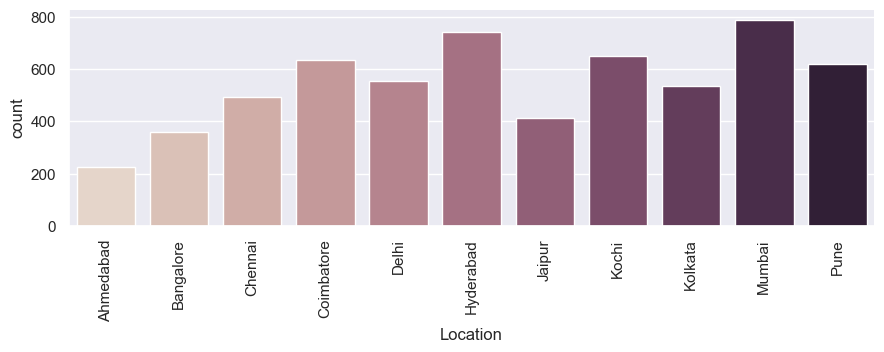

In [448]:
var = "Location"
plt.figure(figsize=(15, 5))
sns.catplot(x=var, kind="count", palette="ch:.15", height=3, aspect=3, data=data_train.sort_values('Location'));
plt.xticks(rotation=90);

**_2.2. Năm sản xuất (year)_**

In [449]:
var = 'Year'
data_train[var].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

**Nhận xét:** Loại xe được bán nhiều tập trung vào loại được sản xuất cách chừng 5 - 7 năm. Điều này cho thấy thị hiếu của khách hàng tập trung vào các loại xe không quá cũ mà vẫn có được mức giá hợp lý. 

MÔ HÌNH LỆCH TRÁI: XU HƯỚNG CHỌN THEO NĂM
**Xử lý : Quy đổi year sang tuổi của xe, do mô hình lệch phải các xe có tuổi >15 năm quy về 15 năm**


<Figure size 1000x500 with 0 Axes>

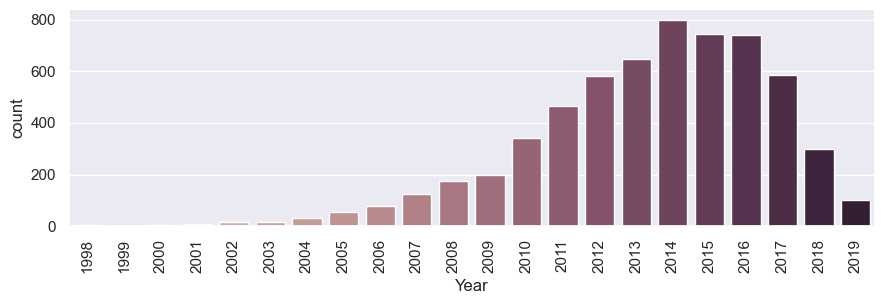

In [450]:
var = "Year"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);

In [451]:
data_train['age'] = 2020 - data_train['Year']
data_train['age'] = data_train['age'].apply(lambda x: 15 if x >14 else x)
data_train = data_train.drop(['Year'],axis = 1)

<Figure size 1000x500 with 0 Axes>

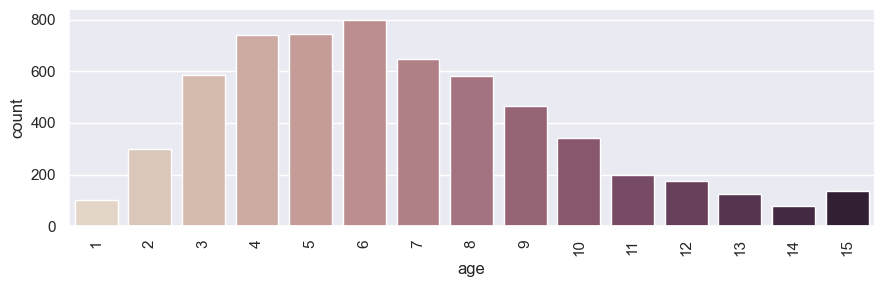

In [452]:
var = "age"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);

**_2.3. Số km đã chạy (Kilometers_Driven)_**

In [453]:
var = 'Kilometers_Driven'
data_train[var].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

**Do dữ liệu được nhập có dữ liệu đã được làm tròn dữ liệu chưa được làm tròn do vậy số lượng các điểm dữ liệu rất lớn gồm 3093 điểm dữ liệu khác nhau, do đó ta có thể bining các dữ liệu thành các nhóm, xử dụng kmean chia các dữ liệu thành 10 cụm dữ liệu khác nhau**

In [454]:
Kilometers_Driven_data = data_train[['Kilometers_Driven','age']]

In [455]:
from sklearn.cluster import KMeans, AgglomerativeClustering
cluster = KMeans(n_clusters=5, random_state=0).fit(Kilometers_Driven_data)
Kilometers_Driven_data['kmeans_cluster'] = cluster.labels_

<Figure size 1000x500 with 0 Axes>

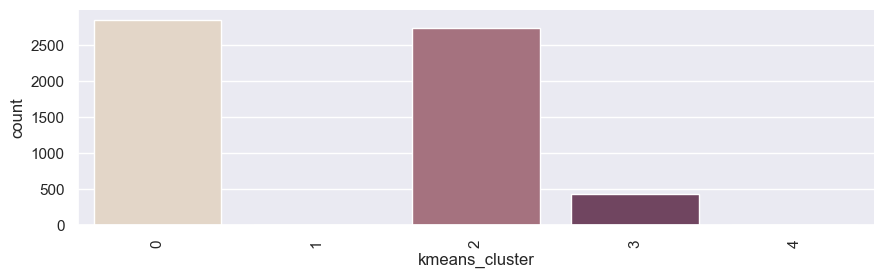

In [456]:
var = "kmeans_cluster"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=Kilometers_Driven_data);
plt.xticks(rotation=90);

**Nhận xét:** Phần lớn số xe cũ đã chạy được từ 45000 đến 60000 km

LÀM TRÒN SỐ LIỆU THEO BIN


<Axes: xlabel='Kilometers_Driven', ylabel='age'>

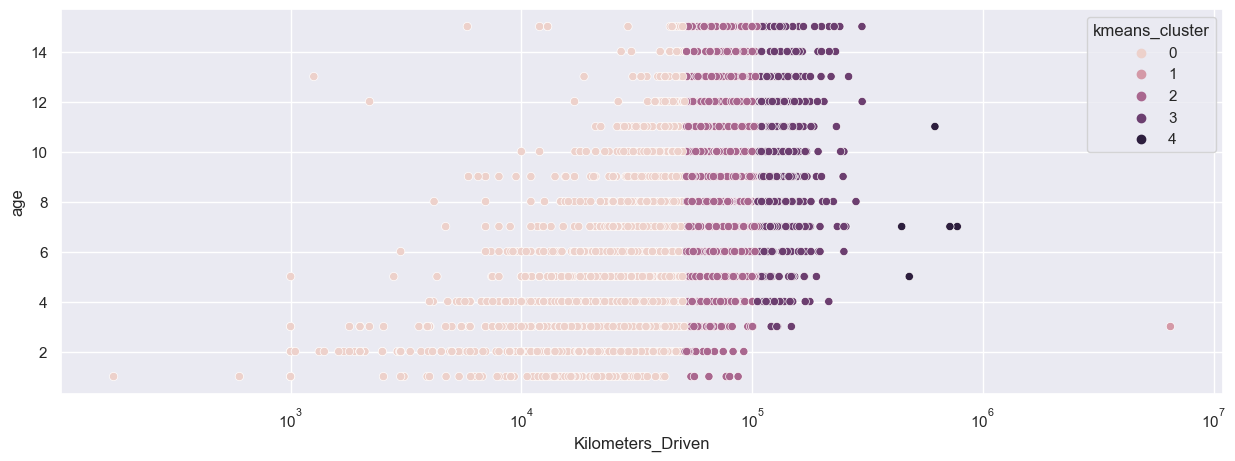

In [457]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
#figure(figsize=(20, 5), dpi=80)
f, ax = plt.subplots(figsize=(15, 5))
ax.set( xscale="log")
sns.scatterplot(y=Kilometers_Driven_data['age'], x=Kilometers_Driven_data['Kilometers_Driven'], hue=Kilometers_Driven_data['kmeans_cluster'])

In [458]:
data_train['Kilometers_Driven_rate'] = Kilometers_Driven_data['kmeans_cluster']

In [459]:
data_train.head()

,Unnamed: 0,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,age,Kilometers_Driven_rate
0,0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0,1.75,MARUTI,10,2
1,1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,0,12.50,HYUNDAI,5,0
2,2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1,4.50,HONDA,9,0
3,3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,0,6.00,MARUTI,8,2
4,4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,0,17.74,AUDI,7,0


**_2.4. Loại nhiên liệu (Fuel_Type)_**

In [460]:
var = 'Fuel_Type'
data_train[var].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [461]:
data_train['Fuel_Type'].describe()

count       6019
unique         5
top       Diesel
freq        3205
Name: Fuel_Type, dtype: object

**Nhận xét:** Có 4 loại nhiên liệu tương ứng với các xe được bán. Trong đó, loại xe chạy nhiên liệu Diesel chiếm đa số với 3152/5872 chiếc.

TÌM HIỂU VỀ TỪNG LOẠI NHIÊN LIỆU
Diesel     Nhiên liệu phổ thông sử dụng nhiều trong ngành công nghiệp oto
Petrol     Được sử dụng phổ thông
CNG          khí hóa lỏng thân thiện với môi trường đc sử dụng ít chỉ khoảng 20tr xe / TG sử dụng loại này
LPG          Khí hóa lỏng đc sử dụng nhiều thứ 2 chỉ sau Diesel
Electric     Năng liện điện thân thiện môi trường
**Các xe cũ chủ yếu sử dụng các loại nhiên liệu truyền thống, rất ít các xe sử dụng các loại nhiên liệu thân thiện với môi trường hiện nay**

In [462]:
##Thêm
data_train['Fuel_Type'] = data_train['Fuel_Type'].apply(lambda x: "Clean_Fuel" if x not in ['Diesel', 'Petrol'] else x)

In [463]:
var = 'Fuel_Type'
data_train[var].value_counts()

Diesel        3205
Petrol        2746
Clean_Fuel      68
Name: Fuel_Type, dtype: int64

<Figure size 1000x500 with 0 Axes>

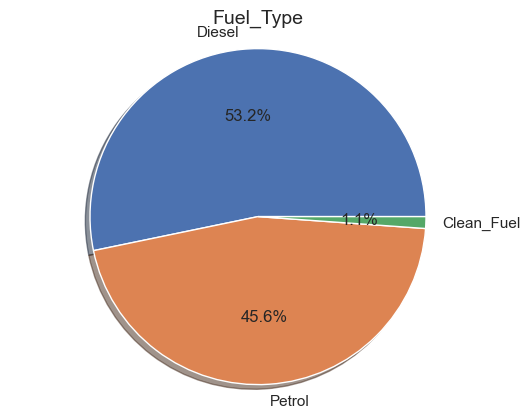

In [464]:
var = "Fuel_Type"
plt.figure(figsize=(10, 5))
labels = ['Diesel', 'Petrol',"Clean_Fuel"]
sizes = [data_train['Fuel_Type'].value_counts()[0],
         data_train['Fuel_Type'].value_counts()[1],
         data_train['Fuel_Type'].value_counts()[2],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

**_2.5. Hộp số (Transmission)_**

In [465]:
var = 'Transmission'
data_train[var].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [466]:
data_train['Transmission'].describe()

count       6019
unique         2
top       Manual
freq        4299
Name: Transmission, dtype: object

<Figure size 1000x500 with 0 Axes>

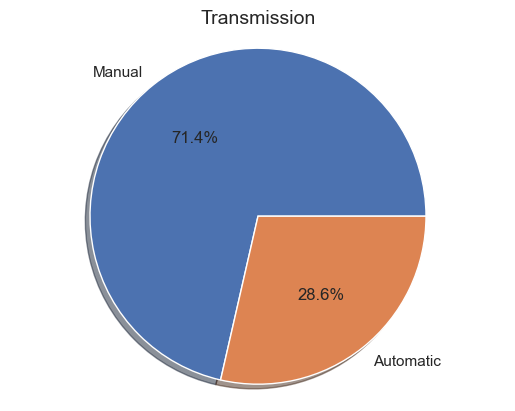

In [467]:
var = "Transmission"
plt.figure(figsize=(10, 5))
labels = ['Manual', 'Automatic']
sizes = [data_train['Transmission'].value_counts()[0],
         data_train['Transmission'].value_counts()[1],
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [468]:
print('Mean of Auto - price: ',data_train[data_train['Transmission'] =='Automatic']['Price'].mean())
print('Mean of Manual - price: ',data_train[data_train['Transmission'] =='Manual']['Price'].mean())

Mean of Auto - price:  19.843970930232558
Mean of Manual - price:  5.33270295417539


**Nhận xét:** Có 2 loại hộp số là số tay và tự động, trong đó, loại xe số tay chiếm đa số với 71%.

**Hầu hết các xe cũ thường là bản số sàn(Manual) do vậy số lượng xe số sàn chiếm đa số trong số lượng xe cũ, bên cạnh đó giá trung bính của 1 xe cũ bản số tự động cũng cao ~4 lần xe số sàn do vậy thị phần ko nhiều do ko phù hợp với kinh tế của nhũng người có nhu cầu mua xe cũ**

**_2.6.Chủ sở hữu (Owner_Type)_**

<Figure size 1000x500 with 0 Axes>

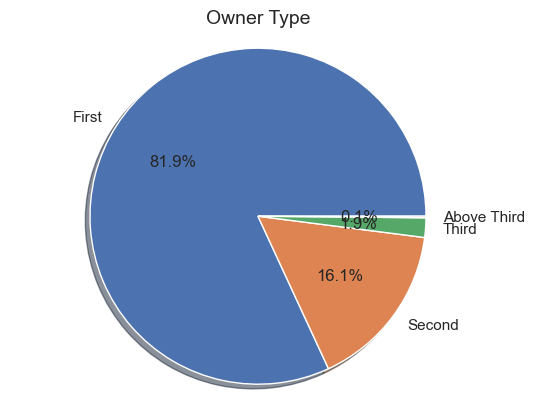

In [469]:
var = "Owner Type"
plt.figure(figsize=(10, 5))
labels = ['First', 'Second',"Third","Above Third"]
sizes = [data_train['Owner_Type'].value_counts()[0],
         data_train['Owner_Type'].value_counts()[1],
         data_train['Owner_Type'].value_counts()[2],
         data_train['Owner_Type'].value_counts()[3],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [470]:
data_train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

**Nhận xét:** Phần lớn số xe cũ được bán mới qua 1 đời chủ, điều này cho thấy người mua xe chú trọng đến tính ổn định, an toàn của chiếc xe (xe trải qua nhiều đời chủ có thể là xe có độ an toàn thấp, sửa chữa nhiều).

**_2.7. Mức tiêu thụ nhiên liệu (Mileage)_**

In [471]:
var = 'Mileage'
data_train[var].value_counts()

17.00    173
18.90    172
18.60    119
20.36     88
21.10     87
        ... 
9.70       1
14.33      1
27.28      1
14.57      1
17.24      1
Name: Mileage, Length: 430, dtype: int64

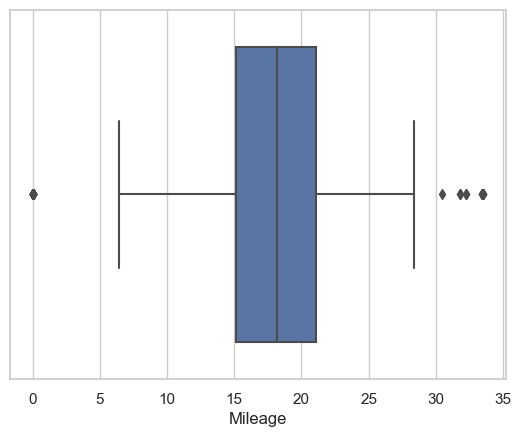

In [472]:
var = 'Mileage'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

**Nhận xét:**
Hầu hết các xe đã qua sử dụng có mức độ tiêu thụ nhiên liệu dao động từ 15 - 21 (km/kg).

**_2.8. Dung tích động cơ (Engine)_**

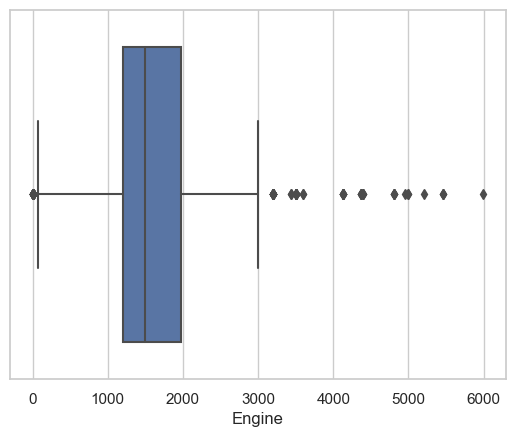

In [473]:
var = 'Engine'
data_train[var].value_counts()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

**Nhận xét:** Hầu hết các xe đã qua sử dụng có dung tích động cơ dao động từ 1200 - 2000 CC.

**_2.9. Sức mạnh động cơ (Power)_**

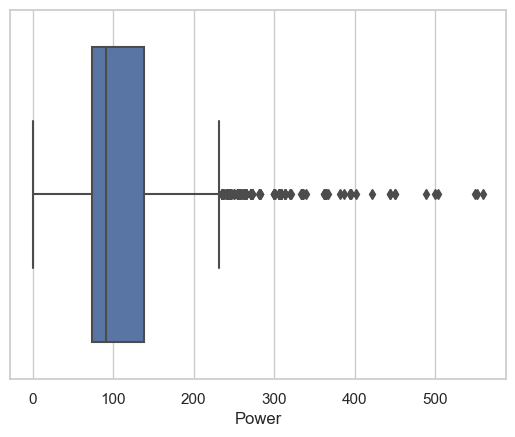

In [474]:
var = 'Power'
data_train[var].value_counts()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

**Nhận xét:** Hầu hết các xe đã qua sử dụng có sức mạnh động cơ dao động quanh mức 100 bhp.

**_2.10. Số ghế (Seats)_**

<Figure size 1000x500 with 0 Axes>

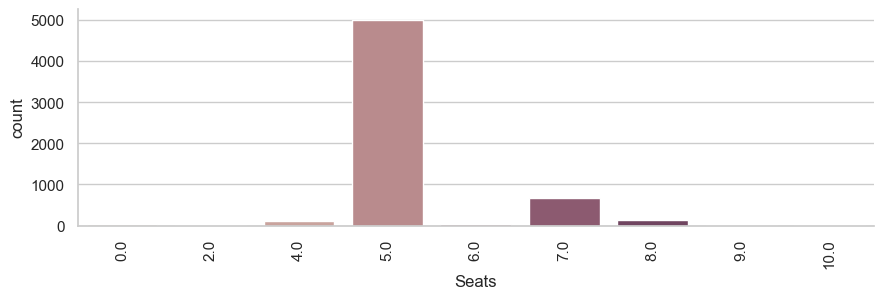

In [475]:
var = 'Seats'
#data_train[var].value_counts()
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);

**Nhận xét:** Dòng xe 5 ghế có số lượng chiếm đại đa số vì phù hợp với gia đình có từ 4 - 6 người, thuận tiện trong di chuyển, không chiếm diện tích gara và dễ dàng trong việc tìm kiếm nơi đỗ tại các địa điểm công cộng.

CƠ CẤU GIA ĐÌNH CỦA ẤN

**_2.11. Nhãn hiệu xe (name)_**

<Figure size 1000x500 with 0 Axes>

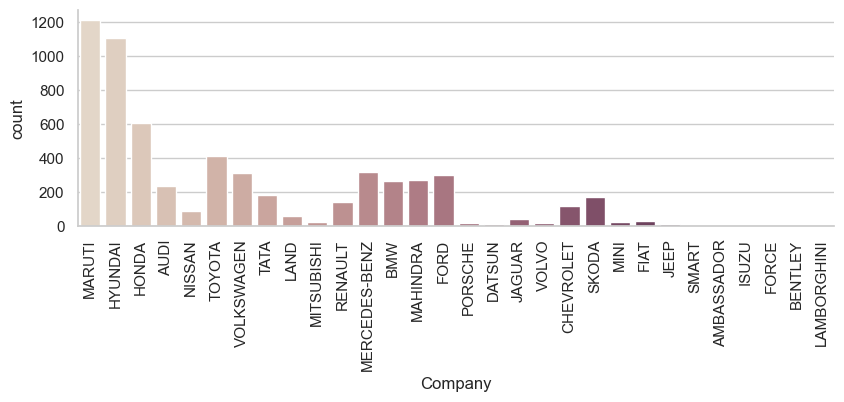

In [476]:
var = 'Company'
#data_train[var].value_counts()
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);
#data_train[var].value_counts()

**Nhận xét:** 2 thương hiệu nhiều nhất thuộc về Maruti và Huyndai. Điều này cho thấy thị hiếu của người sử dụng (có thể những loại xe này có tính năng phù hợp với điều kiện vận hành, đường xá).

TÌM HIỂU THÊM VỀ LOẠI XE ĐƯỢC ƯA CHUỘNG
BIN THÀNH NHIỀU TIÊU CHÍ: NƠI SẢN XUẤT, PHÂN KHÚC

**_2.12. Biến giá (Price)_**

(0.0, 160.0)

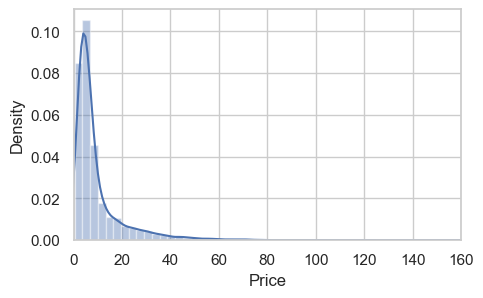

In [477]:
f, ax = plt.subplots(figsize=(5,3))

sns.distplot(data_train['Price'])
plt.xlim([0,160])

<Axes: xlabel='Price', ylabel='Density'>

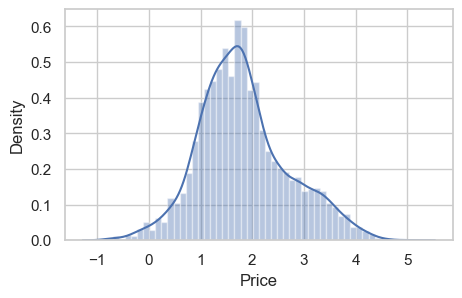

In [478]:
f, ax = plt.subplots(figsize=(5,3))
#ax.set( xscale="log")
sns.distplot(np.log(data_train['Price']))




**Nhận xét:** Đồ thị lệch phải chứng tỏ ít người có thể (hoặc chấp nhận) mua xe với mức giá 160.000 Rupee

**Lưu ý:** Đơn vị tiền tệ của Ấn độ ký hiệu là "lakh" được hiểu như sau: 

_Một lakh là một đơn vị trong hệ thống đánh số Ấn Độ tương đương với một trăm ngàn. Ví dụ, ở Ấn Độ 150.000 rupee trở thành 1,5 lakh rupee_ 

**3. Phân tích sự tương quan giữa biến giải thích (x) và biến phụ thuộc (y)**

**_3.1.Tương quan giữa biến giá và các biến định tính_**

In [479]:
data_anova=ols('Price ~ Company + Location + Fuel_Type + Transmission + Owner_Type', data=data_train).fit()
print(sm.stats.anova_lm(data_anova, typ=2))

                     sum_sq      df           F        PR(>F)
Company       162652.750186    29.0  126.346005  0.000000e+00
Location       13307.034753    10.0   29.976394  5.478288e-57
Fuel_Type       6949.718082     2.0   78.277202  2.770277e-34
Transmission    9382.364174     1.0  211.353960  4.398869e-47
Owner_Type      7649.205771     3.0   57.437191  1.345989e-36
Residual      265151.697447  5973.0         NaN           NaN


**Nhận xét**
Qua phân tích ANOVA về tương quan giữa các biến định tính Company, Location, Fuel_Type, Transmission, Owner_Type ta thấy P value tính ra đều tương đối bé, qua đó có thể thấy sự thay đổi về Giá thành có sự tương quan tới các biến trên


**Vector hóa biến định tính**

In [480]:
varlist = ['Location','age', 'Kilometers_Driven_rate','Fuel_Type','Transmission','Owner_Type','Seats','Company',
           'Mileage','Engine','Power', "Price"]
X = data_train[varlist].copy()

**Nhận xét:**

Đối với mô hình dạng tuyến tính, để có thể tính toán đòi hỏi phải dữ liệu dạng string phải biến đổi để tính toán được. Do vậy, ta sắp xếp lại thứ tự thành dạng: First = 1; Second = 2; Third:3; Fourth & Above:4;

Mặt khác, về mặt dung lượng bộ nhớ và tốc độ xử lý thì dùng thứ tự dạng số sẽ tối ưu hơn thứ tự dạng string.

In [481]:
X.Transmission.replace({'Manual':0,'Automatic':1}, inplace=True)
X.Owner_Type.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4}, inplace=True)

In [482]:
location = np.unique(X.Location)
location = {k: v for v, k in enumerate(location)}
X.Location.replace(location, inplace=True)

In [483]:
Fuel_Type = np.unique(X.Fuel_Type)
Fuel_Type = {k: v for v, k in enumerate(Fuel_Type)}
X.Fuel_Type.replace(Fuel_Type, inplace=True)

In [484]:
Company = np.unique(X.Company)
Company = {k: v for v, k in enumerate(Company)}
X.Company.replace(Company, inplace=True)


In [517]:
Company

{'AMBASSADOR': 0,
 'AUDI': 1,
 'BENTLEY': 2,
 'BMW': 3,
 'CHEVROLET': 4,
 'DATSUN': 5,
 'FIAT': 6,
 'FORCE': 7,
 'FORD': 8,
 'HONDA': 9,
 'HYUNDAI': 10,
 'ISUZU': 11,
 'JAGUAR': 12,
 'JEEP': 13,
 'LAMBORGHINI': 14,
 'LAND': 15,
 'MAHINDRA': 16,
 'MARUTI': 17,
 'MERCEDES-BENZ': 18,
 'MINI': 19,
 'MITSUBISHI': 20,
 'NISSAN': 21,
 'PORSCHE': 22,
 'RENAULT': 23,
 'SKODA': 24,
 'SMART': 25,
 'TATA': 26,
 'TOYOTA': 27,
 'VOLKSWAGEN': 28,
 'VOLVO': 29}

In [486]:
X_final = X.copy()
X_final

,Location,age,Kilometers_Driven_rate,Fuel_Type,Transmission,Owner_Type,Seats,Company,Mileage,Engine,Power,Price
0,9,10,2,0,0,1,5.0,17,26.60,998.0,58.16,1.75
1,10,5,0,1,0,1,5.0,10,19.67,1582.0,126.20,12.50
2,2,9,0,2,0,1,5.0,9,18.20,1199.0,88.70,4.50
3,2,8,2,1,0,1,7.0,17,20.77,1248.0,88.76,6.00
4,3,7,0,1,1,2,5.0,1,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4,6,0,1,0,1,5.0,17,28.40,1248.0,74.00,4.75
6015,6,5,2,1,0,1,5.0,10,24.40,1120.0,71.00,4.00
6016,6,8,2,1,0,2,8.0,16,14.00,2498.0,112.00,2.90
6017,8,7,0,2,0,1,5.0,17,18.90,998.0,67.10,2.65


# PCA

**_3.2. Tương quan giữa các biến định lượng và giá_**

<Axes: >

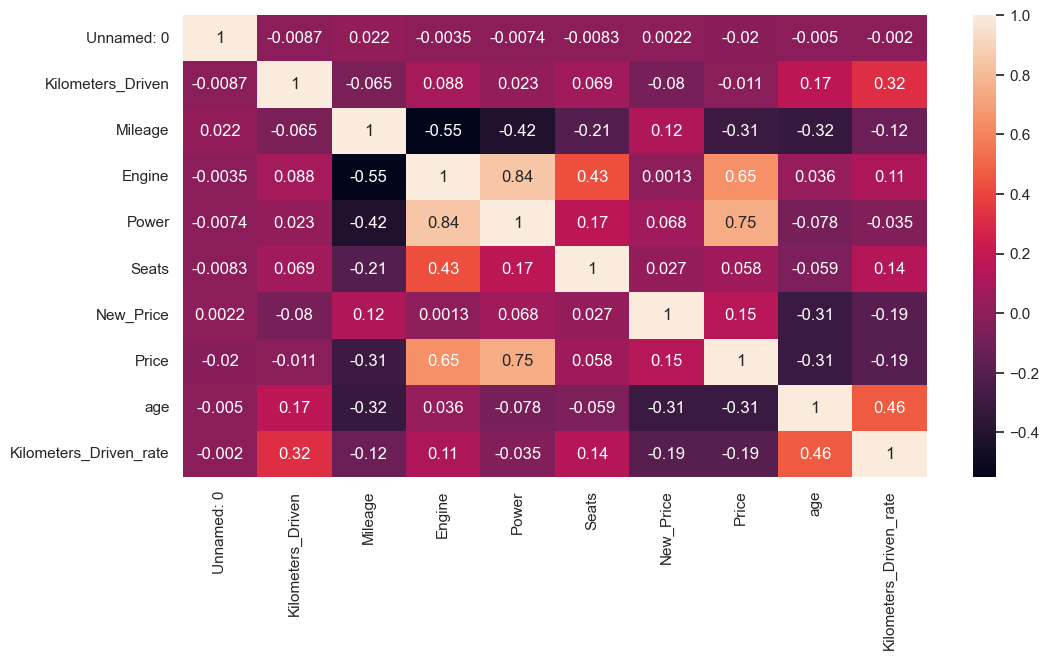

In [487]:
corr = data_train.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True)

In [488]:
corr['Price'].sort_values(ascending=False)

Price                     1.000000
Power                     0.751724
Engine                    0.647232
New_Price                 0.148360
Seats                     0.057656
Kilometers_Driven        -0.011493
Unnamed: 0               -0.020275
Kilometers_Driven_rate   -0.188003
Mileage                  -0.306191
age                      -0.308115
Name: Price, dtype: float64

**Nhận xét tương quan biến Price với các biến giải thích định lương**
- Ta thấy hệ số tương quan của biến Price với các biến Power và Engine tương đối lớn điều đó chứng to các biến có sự tương quan thuận chặt chẽ với nhau. . Mặt khác biến Mileage có tương quan nghịch với Price. Trong khi đó biến Kilometer_Driven và biến Seats có hệ số tương quan tương đối bé có vẻ như các thông số vê Seats và Kilometer_Driven không có nhiều sự ảnh hưởng tới giá cả

> Mileage: Mức tiêu thụ nhiên liệu: Biến định lượng (rời rạc)

> Engine: Dung tích động cơ - Biến định lượng (rời rạc)

> Power: Sức mạnh động cơ (mã lực) - Biến định lượng (rời rạc)

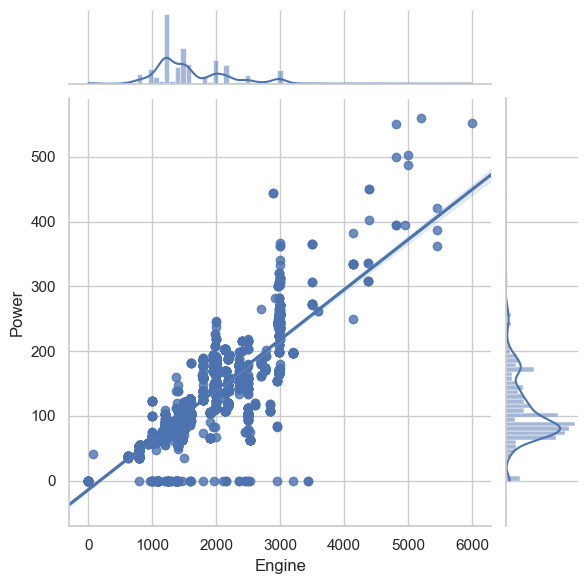

In [489]:
sns.jointplot(y = 'Power',x = 'Engine',data = data_train,kind="reg", truncate=False)

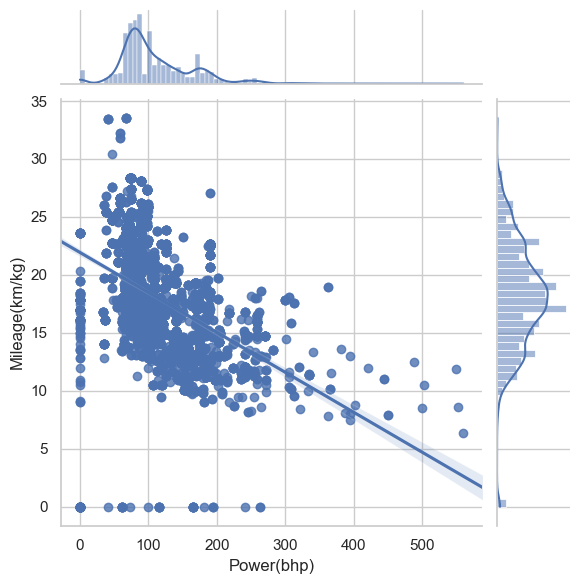

In [402]:
sns.jointplot(x = 'Power(bhp)',y = 'Mileage(km/kg)',data = data_train,kind="reg", truncate=False)

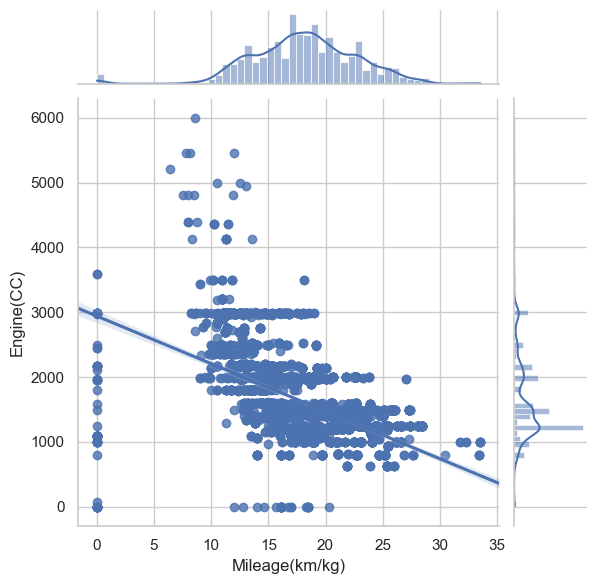

In [403]:
sns.jointplot(y = 'Engine(CC)',x = 'Mileage(km/kg)',data = data_train,kind="reg", truncate=False)

Ta thấy các biến Engine, Power, Mileage có vẻ như có ảnh hưởng tương quan với nhau thể hiện qua hệ số đánh giá độ tương quan r tương đối lớn. Điều đó cũng phản ánh giống kết quả với đồ thị tương quan giữa các cặp biến với nhau. Ở đây ta thấy các điểm dữ liệu phân bố tập trung theo 1 đường thẳng cắt qua các điểm dữ liệu. Điều này cũng hoàn toàn hợp lý với logic thực tế khi các biến trên đều phụ thuộc lớn vào tùy từng loại động cơ oto. Do vậy ta có thể sử dụng phương pháp PCA để có thể giảm được số lượng biến trong mô hình



In [490]:
machine_data = X_final[['Engine','Power','Mileage']]

In [491]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fitting
scalar.fit(machine_data)
machine_data = scalar.transform(machine_data)

from joblib import dump, load
dump(scalar, 'std_scaler_machine.bin', compress=True)

['std_scaler_machine.bin']

In [492]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(machine_data)
x_pca = pca.transform(machine_data)
print(x_pca.shape)
print(sum(pca.explained_variance_ratio_))
dump(pca, 'pca.bin', compress=True)

(6019, 2)
0.9530948024661079


['pca.bin']

KL : Từ 3 biến đã chọn, sau khi áp dụng phương pháp PCA để giảm chiều dữ liệu ta thu được 2 biến mới với mức độ phản ánh dữ liệu là 95.3%

In [493]:
del X_final['Engine']
del X_final['Power']
del X_final['Mileage']

In [494]:
X_final['PCA_1'] = x_pca[:,0]
X_final['PCA_2'] = x_pca[:,1]

In [495]:
X_final

,Location,age,Kilometers_Driven_rate,Fuel_Type,Transmission,Owner_Type,Seats,Company,Price,PCA_1,PCA_2
0,9,10,2,0,0,1,5.0,17,1.75,-2.097579,-0.926591
1,10,5,0,1,0,1,5.0,10,12.50,-0.026307,-0.405866
2,2,9,0,2,0,1,5.0,9,4.50,-0.668469,0.318462
3,2,8,2,1,0,1,7.0,17,6.00,-0.890555,-0.180510
4,3,7,0,1,1,2,5.0,1,17.74,1.004462,0.167557
...,...,...,...,...,...,...,...,...,...,...,...
6014,4,6,0,1,0,1,5.0,17,4.75,-1.860655,-1.485439
6015,6,5,2,1,0,1,5.0,10,4.00,-1.599647,-0.665870
6016,6,8,2,1,0,2,8.0,16,2.90,1.369548,0.433760
6017,8,7,0,2,0,1,5.0,17,2.65,-1.182602,0.439309


# Cluster

Sau khi xử lí các biến liên tục và encoding các biến rời rạc, chúng ta sẽ sử dụng 2 kĩ thuật phân cụm là K-Means và Phân cụm phân cấp như bên dưới.

Đối với thuật toán k-mean, chúng ta thử k từ 1 đến 30 và toán độ phân tán, và sử dụng Quy tắc Elbow để tìm ra giá trị K tối ưu.

Để đánh giá phân phối của biến mục tiêu có khác nhau trên các cụm này hay không, ta sẽ sử dụng ANOVA:

In [496]:
X_final['Price'] = data_train.loc[data_train['Power'] != 'null', 'Price']

In [497]:
X_final

,Location,age,Kilometers_Driven_rate,Fuel_Type,Transmission,Owner_Type,Seats,Company,Price,PCA_1,PCA_2
0,9,10,2,0,0,1,5.0,17,1.75,-2.097579,-0.926591
1,10,5,0,1,0,1,5.0,10,12.50,-0.026307,-0.405866
2,2,9,0,2,0,1,5.0,9,4.50,-0.668469,0.318462
3,2,8,2,1,0,1,7.0,17,6.00,-0.890555,-0.180510
4,3,7,0,1,1,2,5.0,1,17.74,1.004462,0.167557
...,...,...,...,...,...,...,...,...,...,...,...
6014,4,6,0,1,0,1,5.0,17,4.75,-1.860655,-1.485439
6015,6,5,2,1,0,1,5.0,10,4.00,-1.599647,-0.665870
6016,6,8,2,1,0,2,8.0,16,2.90,1.369548,0.433760
6017,8,7,0,2,0,1,5.0,17,2.65,-1.182602,0.439309


# **Mô hình full dữ liệu**

In [498]:
X_final.drop(['Price'], axis=1)

,Location,age,Kilometers_Driven_rate,Fuel_Type,Transmission,Owner_Type,Seats,Company,PCA_1,PCA_2
0,9,10,2,0,0,1,5.0,17,-2.097579,-0.926591
1,10,5,0,1,0,1,5.0,10,-0.026307,-0.405866
2,2,9,0,2,0,1,5.0,9,-0.668469,0.318462
3,2,8,2,1,0,1,7.0,17,-0.890555,-0.180510
4,3,7,0,1,1,2,5.0,1,1.004462,0.167557
...,...,...,...,...,...,...,...,...,...,...
6014,4,6,0,1,0,1,5.0,17,-1.860655,-1.485439
6015,6,5,2,1,0,1,5.0,10,-1.599647,-0.665870
6016,6,8,2,1,0,2,8.0,16,1.369548,0.433760
6017,8,7,0,2,0,1,5.0,17,-1.182602,0.439309


In [499]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_final_scaled = X_scaler.fit_transform(X_final.drop(['Price'], axis=1))
y_final_scaled = y_scaler.fit_transform(X_final[['Price']])

In [500]:
from joblib import dump, load
dump(X_scaler, 'x_std_scaler.bin', compress=True)
dump(y_scaler, 'y_std_scaler.bin', compress=True)

['y_std_scaler.bin']

In [501]:
len(X_final_scaled)

6019

In [502]:
len(y_final_scaled)

6019

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y_final_scaled, test_size = 0.2, random_state = 25)

In [504]:
X_train.shape

(4815, 10)

In [505]:
y_train[:]

array([[ 1.83432147],
       [ 3.44333369],
       [-0.36644971],
       ...,
       [-0.26633339],
       [ 0.10016384],
       [ 0.43001135]])

# Linear Regression  and RF Method not use log(y)

In [506]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("R2 score on Traing set: %.2f"% rf_reg.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% rf_reg.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))


R2 score on Traing set: 0.98
R2 score on Testing set: 0.87
Mean squared error: 0.12


In [507]:
y_pred

array([ 3.48081474, -0.37915614, -0.1550255 , ..., -0.61455269,
        0.34787127,  2.38678088])

# Use log(y) with 2 method

In [508]:
X_final_2 = X_final.copy()
X_final_2['Price'] = np.log(X_final_2['Price'])
X_final_2.head()

,Location,age,Kilometers_Driven_rate,Fuel_Type,Transmission,Owner_Type,Seats,Company,Price,PCA_1,PCA_2
0,9,10,2,0,0,1,5.0,17,0.559616,-2.097579,-0.926591
1,10,5,0,1,0,1,5.0,10,2.525729,-0.026307,-0.405866
2,2,9,0,2,0,1,5.0,9,1.504077,-0.668469,0.318462
3,2,8,2,1,0,1,7.0,17,1.791759,-0.890555,-0.180510
4,3,7,0,1,1,2,5.0,1,2.875822,1.004462,0.167557


In [509]:
X_final_2_scaled = scaler.fit_transform(X_final_2)

In [510]:
X2 = X_final_2_scaled[:,0:-1]
y2 = X_final_2_scaled[:,-1]

In [511]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 25)

In [512]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X2_train, y2_train.T)
y2_pred= linear_reg.predict(X2_test)

print("R2 score on Traing set: %.2f " % linear_reg.score(X2_train,y2_train))
print("R2 score on Testing set: %.2f" % linear_reg.score(X2_test,y2_test))
print('Mean squared error: %.2f'% mean_squared_error(y2_test,y2_pred))

R2 score on Traing set: 0.32 
R2 score on Testing set: 0.41
Mean squared error: 0.56


In [513]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X2_train, y2_train)
y2_pred= rf_reg.predict(X2_test)
print("R2 score on Traing set: %.2f"% rf_reg.score(X2_train,y2_train))
print("R2 score on Testing set: %.2f"% rf_reg.score(X2_test,y2_test))
print('Mean squared error: %.2f'% mean_squared_error(y2_test,y2_pred))

R2 score on Traing set: 0.98
R2 score on Testing set: 0.82
Mean squared error: 0.17


In [514]:
rf_reg = RandomForestRegressor()

final_model = rf_reg.fit(X_train, y_train)

In [515]:
import pickle
import os
# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('/home/kuanghiu/PycharmProjects/car_predict/car_price_predict/pkl/rf_reg.pkl', 'wb') as fileWriteStream:
    pickle.dump(final_model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /home/kuanghiu/PycharmProjects/car_predict/car_price_predict/notebook
